## Import

In [119]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')

from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing 

In [120]:
#file = open(r'C:\Users\Marta\Downloads\iris.data')

In [121]:
#file= pd.read_excel('tmp.xlsx', index_col=0) 

In [122]:
#iris= pd.read_table(r'C:\Users\Marta\Downloads\iris.data')

In [123]:
iris = pd.read_csv(r'C:\Users\Marta\Downloads\iris.data', 
                   sep=",", engine="python", decimal=',', encoding="latin1", names=['SepalLengthCm','SepalWidthCm', 'PetalLengthCm','PetalWidthCm','Species'])
iris.head()
#  skiprows=1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Explore

In [124]:
np.unique(iris['Species'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [125]:
iris['PetalWidthCm'].describe().apply(lambda x: format(x, 'f'))

count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: PetalWidthCm, dtype: object

In [126]:
obs = df.shape
types = df.dtypes
counts = df.apply(lambda x: x.count())
uniques = df.apply(lambda x: [x.unique()])
nulls = df.apply(lambda x: x.isnull().sum())
distincts = df.apply(lambda x: x.unique().shape[0])
missing_ration = (df.isnull().sum()/ obs) * 100
skewness = df.skew()  #
kurtosis = df.kurt() 

NameError: name 'df' is not defined

In [127]:
#BINNING

bins=[0.10,0.50,1,1.5,2,2.5]
choices =['0.10-0.50','0.50-1','1-1.5','1.5-2','2-2.5']
#iris['PetalWidthCm']=pd.cut(iris['PetalWidthCm'],bins=bins,labels=choices)
#sns.countplot(iris['PetalWidthCm'])

In [26]:
#CONVERT TO PERCENTAGE
def conv(year):
  return housing_data[housing_data['year_of_sale']==year].groupby('price_range').size()
perc_total = [x/sum(x)*100 for x in [conv(2003),conv(2004),conv(2005),conv(2006),conv(2007),conv(2008),conv(2009),conv(2010),conv(2011),conv(2012),conv(2013),conv(2014),conv(2015),conv(2016),conv(2017)]]
year_names = list(range(2003,2018))
housing_df = pd.DataFrame(perc_total, index= year_names)

NameError: name 'housing_data' is not defined

In [128]:
iris.skew()   # has to be close to 0

SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [129]:
iris.kurt() #has to be close to 3

SepalLengthCm   -0.552064
SepalWidthCm     0.290781
PetalLengthCm   -1.401921
PetalWidthCm    -1.339754
dtype: float64

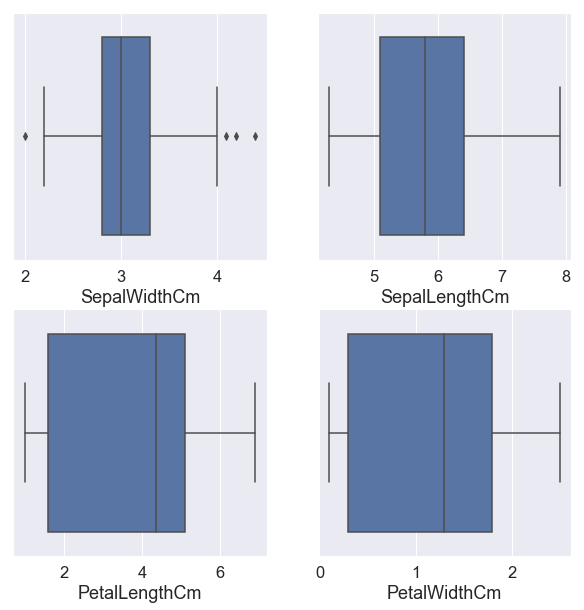

In [130]:
fig = plt.figure(figsize=(10,10))
fig1 = fig.add_subplot(221);sns.boxplot(iris['SepalWidthCm'])
fig2 = fig.add_subplot(222);sns.boxplot(iris['SepalLengthCm'])
fig3 = fig.add_subplot(223);sns.boxplot(iris['PetalLengthCm'])
fig4 = fig.add_subplot(224);sns.boxplot(iris['PetalWidthCm'])

In [131]:
#OUTLIERS
iris= iris[np.abs(iris['SepalWidthCm']-iris['SepalWidthCm'].mean()) <= (3*iris['SepalWidthCm'].std())] 

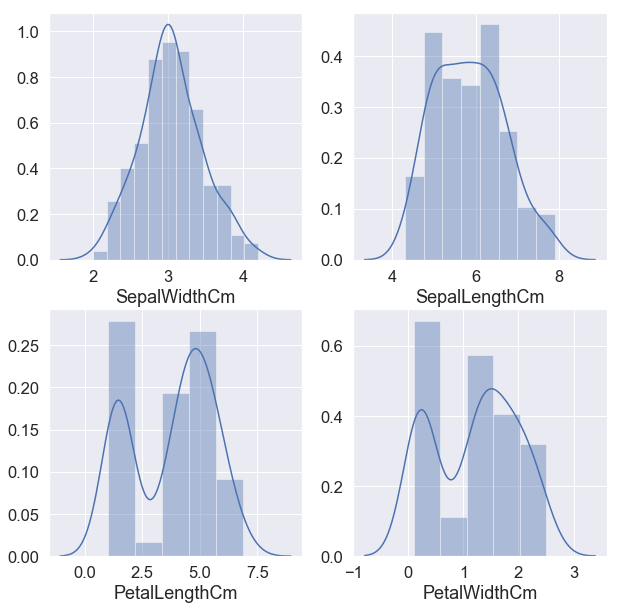

In [132]:
fig = plt.figure(figsize=(10,10))
fig1 = fig.add_subplot(221);sns.distplot(iris['SepalWidthCm'])
fig2 = fig.add_subplot(222);sns.distplot(iris['SepalLengthCm'])
fig3 = fig.add_subplot(223);sns.distplot(iris['PetalLengthCm'])
fig4 = fig.add_subplot(224);sns.distplot(iris['PetalWidthCm'])

In [133]:
#LOG TRANSFORMATION
#iris['PetalWidthCm'] = np.log1p(iris['PetalWidthCm'])

In [134]:
#VALUE COUNTS
iris['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Species, dtype: int64

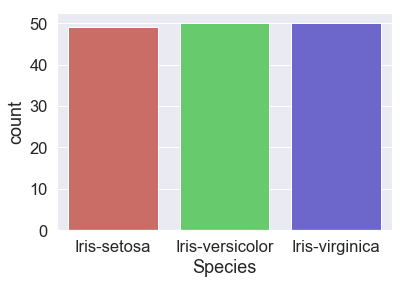

In [135]:
sns.countplot(x = 'Species', data = iris, palette = 'hls')
plt.show()

In [136]:
iris.shape

(149, 5)

In [137]:
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

## Relationships between variables

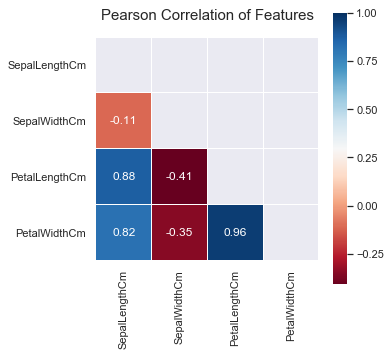

In [138]:
#CORRELATION MATRIX

iris_corr = iris.corr()
mask = np.zeros_like(iris_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
colormap = plt.cm.RdBu
plt.figure(figsize=(5,5))
sns.set(font_scale=1)
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(iris_corr,linewidths=0.1,vmax=1.0, mask=mask,
            square=True, cmap=colormap, linecolor='white', annot=True)

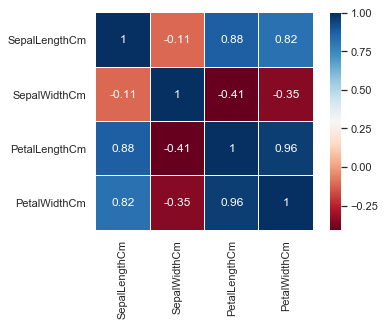

In [139]:
iris_corr = iris.corr()
sns.heatmap(iris_corr,linewidths=0.1,vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)

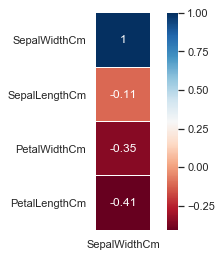

In [140]:
sns.heatmap(iris_corr[['SepalWidthCm']].sort_values(by=['SepalWidthCm'],ascending=False)
                        ,linewidths=0.2,vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)

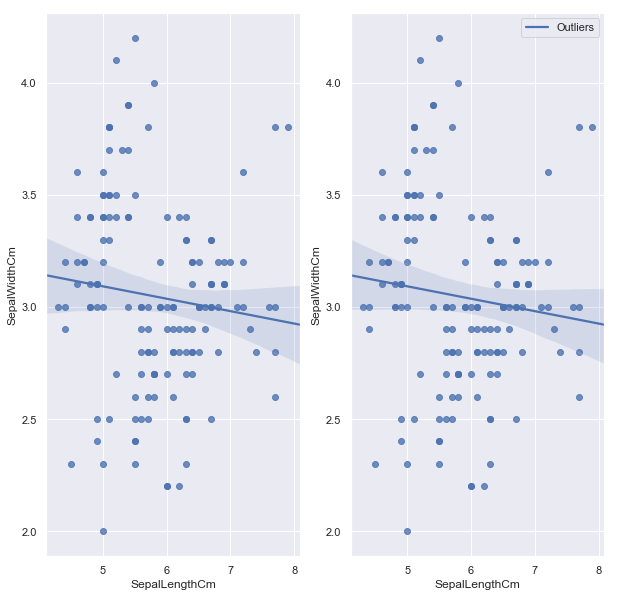

In [141]:
#LINEAR RELATIONSHIP
fig = plt.figure(figsize=(10,10))
fig1 = fig.add_subplot(121); sns.regplot(x='SepalLengthCm', y='SepalWidthCm', data=iris);
fig2 = fig.add_subplot(122); sns.regplot(x='SepalLengthCm', y='SepalWidthCm', data=iris); plt.legend(['Outliers'])

Text(0,0.5,'Targets')

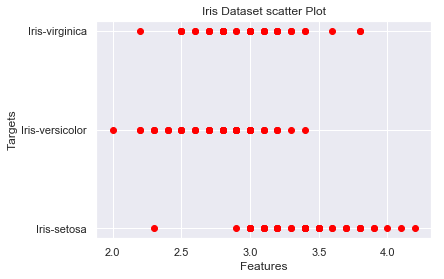

In [142]:
#CLASS RELATIONSHIP

plt.scatter(iris.SepalWidthCm, iris.Species, color='red', alpha =1.0)
plt.rcParams['figure.figsize'] = [10,8]
plt.title('Iris Dataset scatter Plot')
plt.xlabel('Features')
plt.ylabel('Targets')

### Cálculos 

In [143]:
#data_detalle['Precio m2'] = data_detalle.loc[:, ['IMPTOTAL', 'SUPERF_ADOPTADA']].apply(lambda s: s[0]/s[1], axis=1)


In [ ]:
#data_pred_index = data_pred.loc[:,['MATRICULA','Fecha_num']].groupby('MATRICULA').idxmax()   #agrupamos por matrícula (la fecha más posterior)

In [ ]:
# Fechas
#data_pred.loc[:,'EDIF_FECHA_CONSTRUCCION'] = data_pred['EDIF_FECHA_CONSTRUCCION'].apply(lambda s: (s[5:9]))

### Encode and scale categorical variables

In [144]:
continuous_cols= ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
features = iris[continuous_cols]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
iris[continuous_cols] = features

In [145]:
#Crear variables dummies 
#hi= iris.loc[:,['column']]
#dummy = pd.get_dummies(hi)
#iris = pd.concat([iris, dummy], axis=1)
#iris = iris.drop(['column'], axis=1)

In [146]:
#Encode 

#Recodificar
data_pred= data_pred.replace('SI', '1')
data_pred= data_pred.replace('NO', '0')
data_pred= data_pred.replace('LIBRE', 'Libre' )
data_pred= data_pred.replace('ESPECIAL', 'Especial')


NameError: name 'data_pred' is not defined

In [147]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
iris['Species']= label_encoder.fit_transform(iris['Species']) 
iris['Species'].unique() 

array([0, 1, 2], dtype=int64)

### Train test 

In [266]:
iris=pd.DataFrame(iris)

In [267]:
#split = 2     train,test = data[:split,:],data[split:,:]
x = iris[feature_cols] # Features
y = iris.Species # Target variable

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

In [268]:
x_test.shape

(30, 4)

In [269]:
[*iris]

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

In [ ]:
***MAYBE***

In [153]:
#  X, y = data[:, :-1], data[:, -1]   all rows and all columns up to the last; all rows and the last column
x_train = train.drop(columns=['Species'])
y_train = train.loc[:,'Species']
x_train = np.asarray(x_train)
y_train = np.asarray(y_train).reshape(len(y_train),1)
x_test = test.drop(columns=['Species'])
y_test = test.loc[:,'Species']
x_test = np.asarray(x_test)
y_test = np.asarray(y_test).reshape(len(y_test),1)
# some libraries require a one-dimensional array of output variables (y) be shaped as a two-dimensional array with one column 

### Decision tree 1 

In [270]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import GridSearchCV

In [271]:
[*iris]

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

In [272]:
feature_cols= ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [273]:
#clf = DecisionTreeClassifier()

clf = DecisionTreeClassifier(criterion="gini")

In [274]:
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [275]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8666666666666667


### Decision tree 2 (with gridsearch)

In [244]:
from sklearn import tree
from sklearn.metrics import mean_squared_error
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
pipe_tree = make_pipeline(tree.DecisionTreeRegressor(random_state=1))
rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)

In [276]:
depths = np.arange(1, 21)
num_leafs = [1, 5, 10, 20, 50, 100]
param_grid = [{'decisiontreeregressor__max_depth':depths,
              'decisiontreeregressor__min_samples_leaf':num_leafs}]
gs = GridSearchCV(estimator=pipe_tree, param_grid=param_grid, scoring=rmse_scorer, cv=10)
gs = gs.fit(x_train, y_train)
print(-gs.best_score_)
print(gs.best_params_)
my_model = gs.best_estimator_
my_model.fit(x_train, y_train)
y_predicted = my_model.predict(x_test)

0.16454550867148232
{'decisiontreeregressor__max_depth': 3, 'decisiontreeregressor__min_samples_leaf': 1}


In [277]:
root_mean_squared_error(y_test, y_predicted)

0.3293592395098687

In [280]:
y_predicted = my_model.predict(x_validation)
root_mean_squared_error(y_validation, y_predicted)

0.1032907230671837

### XGBoost 

In [227]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [213]:
data_dmatrix = xgb.DMatrix(data=x,label=y)

C:\Users\Marta\Anaconda35\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Marta\Anaconda35\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [219]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [220]:
xg_reg.fit(x_train,y_train)

pred = xg_reg.predict(x_test)

C:\Users\Marta\Anaconda35\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [221]:
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE: %f" % (rmse))

RMSE: 0.442040


In [222]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.904694,0.014704,0.906613,0.037363
1,0.847880,0.013270,0.852686,0.038901
2,0.802937,0.013509,0.808423,0.043109
3,0.759512,0.017822,0.767860,0.042058
4,0.722695,0.016599,0.732360,0.055091


In [223]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.366006
Name: test-rmse-mean, dtype: float64


In [224]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

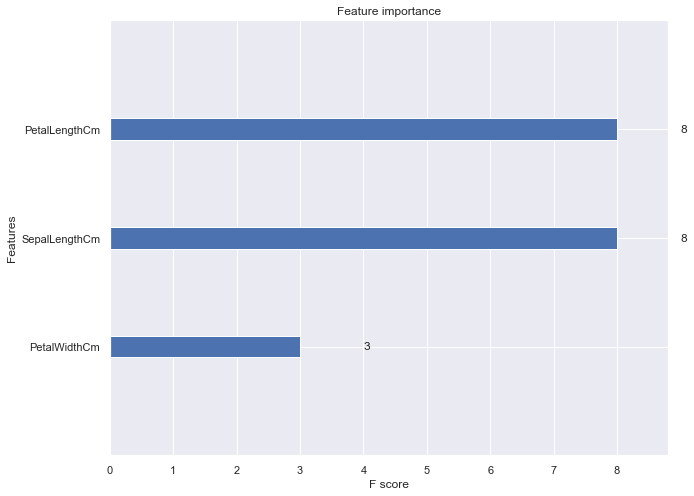

In [226]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

### XGBOOST with GRIDSEARCH

In [299]:
parameters = {'nthread':[4,5,6], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6,7,8],
              'min_child_weight': [5,10,15],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.1,0.5,0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}

In [300]:
xgb_model = xgb.XGBClassifier()
clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=5, 
                   scoring='accuracy',
                   verbose=2, refit=True)

In [301]:
clf = clf.fit(x_train, y_train)
print(-clf.best_score_)
print(clf.best_params_)
my_model = clf.best_estimator_
my_model.fit(x_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   10.9s
[Parallel(n_jobs=5)]: Done 234 tasks      | elapsed:   14.2s
[Parallel(n_jobs=5)]: Done 396 out of 405 | elapsed:   16.3s remaining:    0.3s
[Parallel(n_jobs=5)]: Done 405 out of 405 | elapsed:   16.5s finished


-0.9263157894736842
{'colsample_bytree': 0.1, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 5, 'missing': -999, 'n_estimators': 5, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}


C:\Users\Marta\Anaconda35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [304]:
y_predicted = my_model.predict(x_test)
root_mean_squared_error(y_test, y_predicted)

C:\Users\Marta\Anaconda35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.31622776601683794

In [305]:
y_predicted = my_model.predict(x_validation)
root_mean_squared_error(y_validation, y_predicted)

C:\Users\Marta\Anaconda35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.2041241452319315

In [ ]:
n = int(input())
for i in range(n):
    a, b = input().strip().split(' ')
    print (int(a) + int(b))

In [307]:
arr = range(1000000000)
arr

range(0, 1000000000)

## Model

In [154]:
# THREE CLASSIFICATION MODELS IN A LOOP


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
models = [RandomForestRegressor(n_estimators=200,criterion='mse',max_depth=20,random_state=100),DecisionTreeRegressor(criterion='mse',max_depth=11,random_state=100),GradientBoostingRegressor(n_estimators=200,max_depth=12)]
learning_mods = pd.DataFrame()
temp = {}#run through models
for model in models:
    print(model)
    m = str(model)
    temp['Model'] = m[:m.index('(')]
    model.fit(x_train, y_train)
    temp['R2_Price'] = r2_score(y_test, model.predict(x_test))
    print('score on training',model.score(x_train, y_train))
    print('r2 score',r2_score(y_test, model.predict(x_test)))
    learning_mods = learning_mods.append([temp])
learning_mods.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
learning_mods.R2_Price.plot(ax=axes, kind='bar', title='R2_Price')
plt.show()

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=100, verbose=0, warm_start=False)


C:\Users\Marta\Anaconda35\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


NameError: name 'r2_score' is not defined

In [ ]:
regressionTree_imp = model.feature_importances_
plt.figure(figsize=(16,6))
plt.yscale('log',nonposy='clip')
plt.bar(range(len(regressionTree_imp)),regressionTree_imp,align='center')
plt.xticks(range(len(regressionTree_imp)),features,rotation='vertical')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.show()

#feature importance

In [ ]:
#CHULETA DE VISUALIZACION. PONERLO TODO JUNTO Y VER SI PUEDO HACER EL STACKED BAR PLOT
#CHULETA DE MODELOS DE CLASIFICACION. VER SI PUEDO HACER EL LOOP
#CHULETA DE SQL
#MAÑANA Y EL MARTES HAGO EL TEST